# Linear Regression -- Weight Confidence Intervals

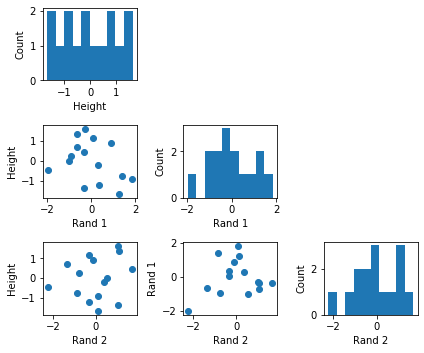

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.plotting import scatterplotmatrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np


# https://en.wikipedia.org/wiki/Simple_linear_regression#Confidence_intervals
# This data set gives average masses for women as a function of their height in a sample of American women of age 30–39. 

height_in_m = [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83]
mass_in_kg = [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]

np.random.seed(0)
rand1 = np.random.normal(size=len(height_in_m), scale=10, loc=5)
rand2 = np.random.normal(size=len(height_in_m))

X_train = np.array([(i, j, k) for i, j, k in zip(height_in_m, rand1, rand2)])
y_train = np.array(mass_in_kg)

sc_features = StandardScaler()
sc_target = StandardScaler()

X_std = sc_features.fit_transform(X_train)
y_std = sc_target.fit_transform(y_train.reshape(-1, 1)).flatten()

scatterplotmatrix(X_std, names=['Height','Rand 1', 'Rand 2'], 
                  figsize=(6, 5))
plt.tight_layout()
plt.show()

## Weight coefficients

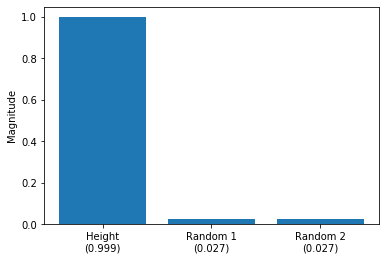

In [2]:
lr = LinearRegression()
lr.fit(X_std, y_std)

fig, ax = plt.subplots()
ax.bar([0, 1, 2], lr.coef_)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Height\n({lr.coef_[0]:.3f})',
                    f'Random 1\n({lr.coef_[1]:.3f})',
                    f'Random 2\n({lr.coef_[2]:.3f})'])
plt.ylabel('Magnitude')
plt.show()

In [3]:
lr.intercept_

-2.1024223302105473e-15

In [4]:
# y = 0.5 in kg
print(0.5 * np.sqrt(sc_target.var_) + sc_target.mean_)

[65.4774427]


In [5]:
# y = 1.5 in kg
print(1.5 * np.sqrt(sc_target.var_) + sc_target.mean_)

[72.2763281]


In [6]:
print(np.sqrt(sc_target.var_))

[6.7988854]


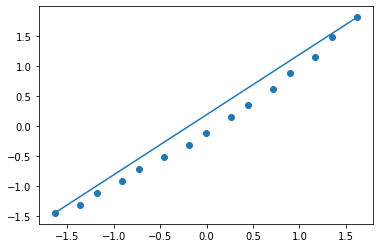

In [7]:
y_pred = lr.predict(X_std)
plt.scatter(X_std[:, 0], y_std)

x1, x2 = X_std[:, 0].argmin(), X_std[:, 0].argmax()
plt.plot([X_std[x1, 0], X_std[x2, 0]], [y_std[x1], y_std[x2]])

plt.show()

In [8]:
def std_err_linearregression(y_true, y_pred, x):
    n = len(y_true)
    mse = np.sum((y_true - y_pred)**2) / (n-2)
    std_err = (np.sqrt(mse) / np.sqrt(np.sum((x - np.mean(x, axis=0))**2, axis=0)))
    return std_err


def weight_intervals(n, weight, std_err, alpha=0.05):
    t_value = stats.t.ppf(1 - alpha/2, df=n - 2)
    temp = t_value * std_err
    lower = weight - temp
    upper = weight + temp

    return lower, upper

In [9]:
y_pred = lr.predict(X_std)

std_err = std_err_linearregression(y_std, y_pred, X_std)

lower, upper = weight_intervals(len(y_std), lr.coef_, std_err)

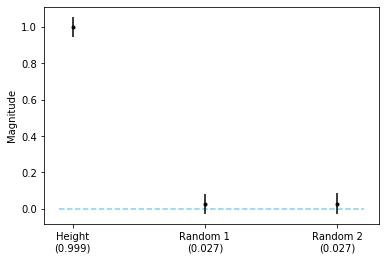

In [25]:
fig, ax = plt.subplots()

ax.hlines(0, xmin=-0.1, xmax=2.2, linestyle='dashed', color='skyblue')
ax.errorbar([0, 1, 2], lr.coef_, yerr=upper - lr.coef_, fmt='.k')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Height\n({lr.coef_[0]:.3f})',
                    f'Random 1\n({lr.coef_[1]:.3f})',
                    f'Random 2\n({lr.coef_[2]:.3f})'])
plt.ylabel('Magnitude');

In [ ]:
lower, upper

---

In [33]:
import statsmodels.api as sm

mod = sm.OLS(y_std, X_std)
res = mod.fit()
lower, upper = res.conf_int(0.05)[:, 0], res.conf_int(0.05)[:, 1]

In [34]:
lower, upper

(array([ 0.93337272, -0.03899289, -0.03548572]),
 array([1.06536057, 0.09297103, 0.09006354]))

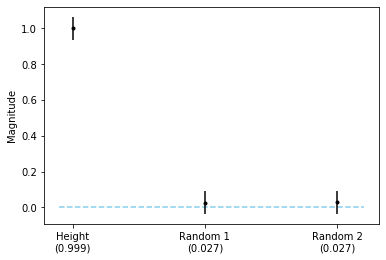

In [35]:
fig, ax = plt.subplots()

ax.hlines(0, xmin=-0.1, xmax=2.2, linestyle='dashed', color='skyblue')
ax.errorbar([0, 1, 2], res.params, yerr=upper - res.params, fmt='.k')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Height\n({lr.coef_[0]:.3f})',
                    f'Random 1\n({lr.coef_[1]:.3f})',
                    f'Random 2\n({lr.coef_[2]:.3f})'])
plt.ylabel('Magnitude');